In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [24]:
dataset = pd.read_csv('/content/Depression Student Dataset.csv')

In [25]:
dataset.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [26]:
dataset.keys()

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [28]:
dataset.shape[0]

502

In [29]:
dataset["Depression"].value_counts()

,count
Depression,
Yes,252
No,250


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Academic Pressure'}>],
       [<Axes: title={'center': 'Study Satisfaction'}>,
        <Axes: title={'center': 'Study Hours'}>],
       [<Axes: title={'center': 'Financial Stress'}>, <Axes: >]],
      dtype=object)

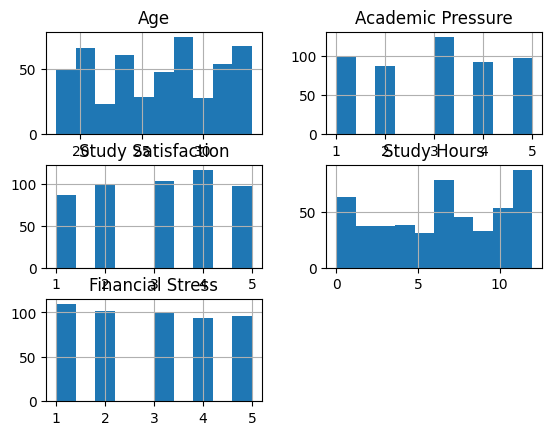

In [30]:
dataset.hist()

In [31]:
def calculate_correlations_simple(dataset, target_column):
    """
    Calculates correlations with label encoding for categoricals.
    """

    num_features = dataset.select_dtypes(include=['int64', 'float64']).columns
    cat_features = dataset.select_dtypes(include=['object']).columns

    # Create a copy to avoid modifying the original DataFrame
    dataset_encoded = dataset.copy()

    # Label encode categorical features
    for col in cat_features:
        dataset_encoded[col] = dataset_encoded[col].astype('category').cat.codes

    # Calculate correlations
    correlations = dataset_encoded.corr()[target_column]
    correlations = correlations.drop(target_column)  # Remove self-correlation

    return correlations


target = "Depression"
correlations = calculate_correlations_simple(dataset, target)

if correlations is not None:
    # Sort by absolute value to see strongest relationships
    sorted_correlations = correlations.abs().sort_values(ascending=False)
    print("\nSorted Correlations (absolute value):")
    print(sorted_correlations)


Sorted Correlations (absolute value):
Academic Pressure                        0.476259
Have you ever had suicidal thoughts ?    0.466296
Financial Stress                         0.296846
Study Satisfaction                       0.293484
Age                                      0.215625
Study Hours                              0.200441
Dietary Habits                           0.186685
Family History of Mental Illness         0.056087
Sleep Duration                           0.051708
Gender                                   0.031683
Name: Depression, dtype: float64


In [32]:
dataset.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


<Axes: title={'center': 'Age'}, xlabel='Gender'>

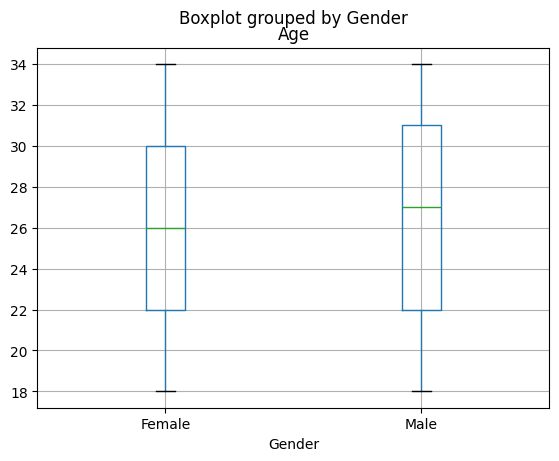

In [33]:
dataset.boxplot(column='Age',by='Gender')

<Axes: ylabel='count'>

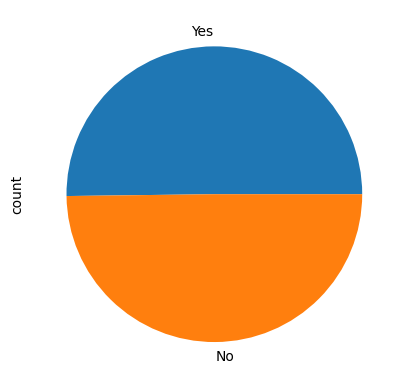

In [34]:
dataset['Depression'].value_counts().plot.pie()

<ipython-input-35-07b96c13b2e5>:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(dataset[column]) or pd.api.types.is_object_dtype(dataset[column]):


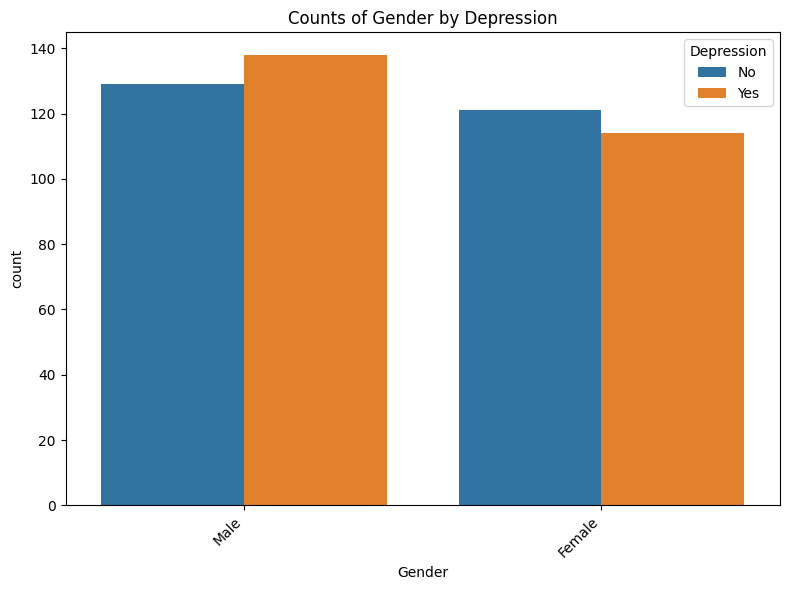

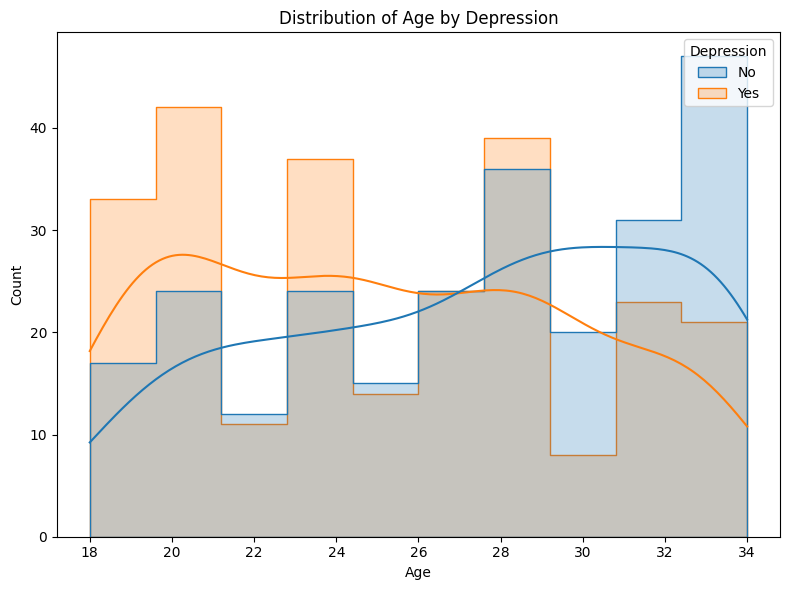

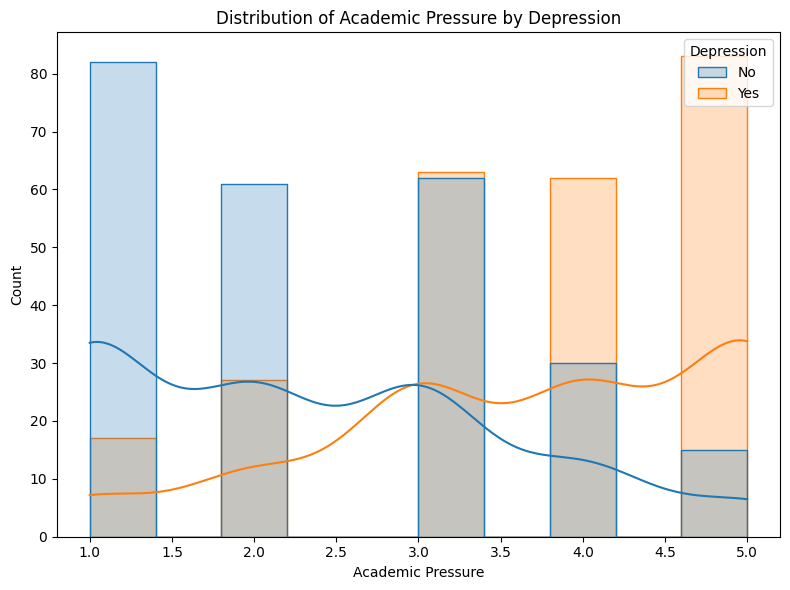

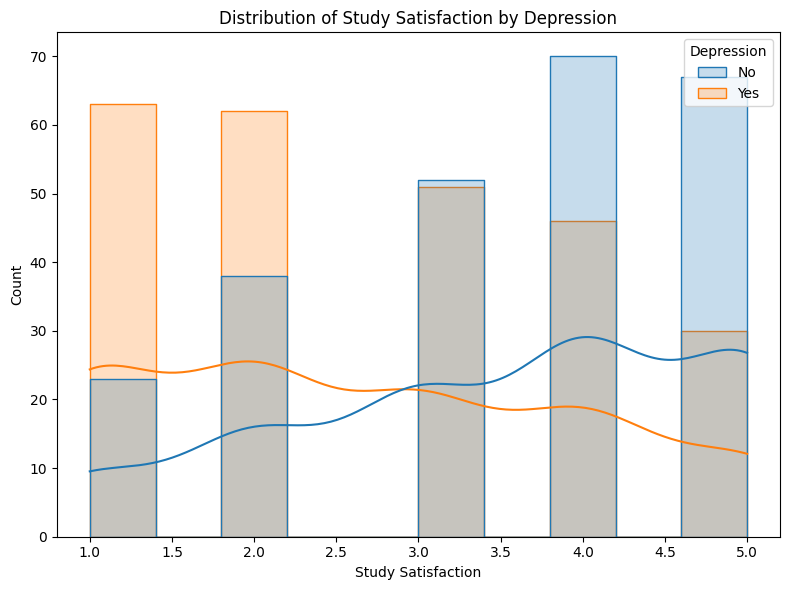

<ipython-input-35-07b96c13b2e5>:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(dataset[column]) or pd.api.types.is_object_dtype(dataset[column]):


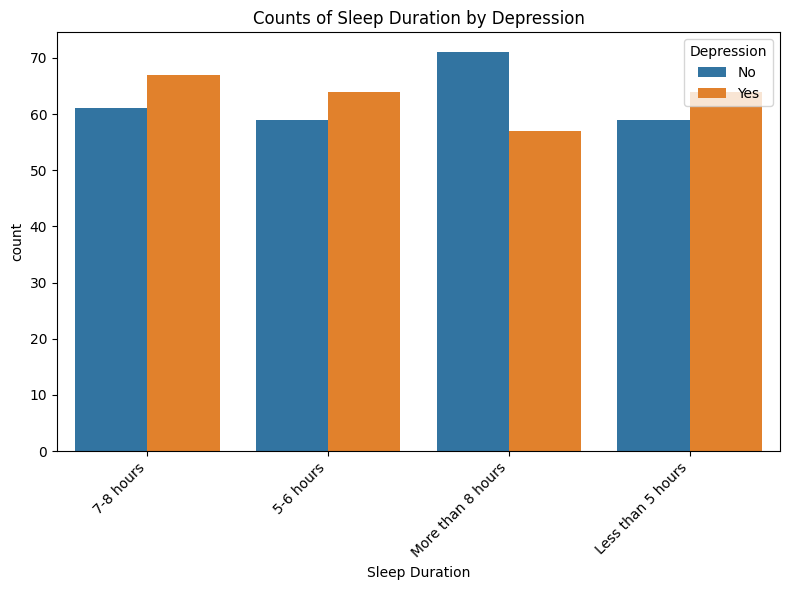

<ipython-input-35-07b96c13b2e5>:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(dataset[column]) or pd.api.types.is_object_dtype(dataset[column]):


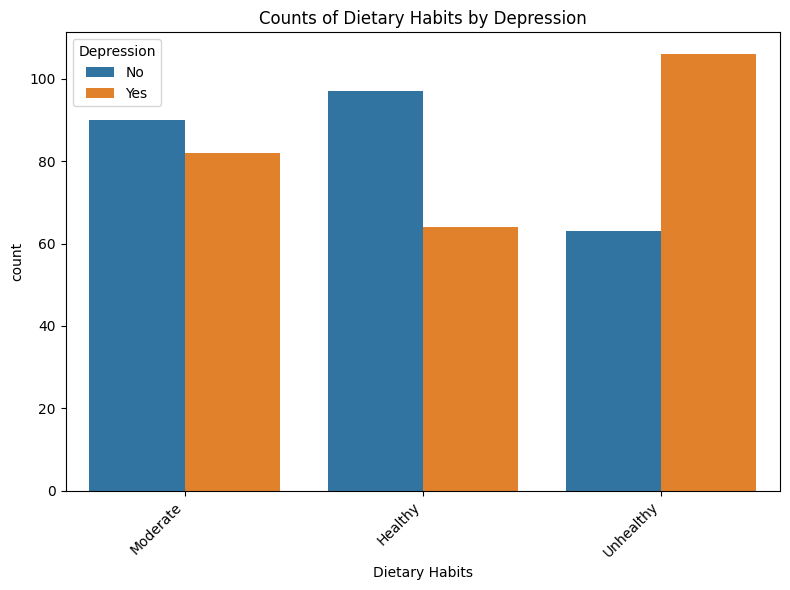

<ipython-input-35-07b96c13b2e5>:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(dataset[column]) or pd.api.types.is_object_dtype(dataset[column]):


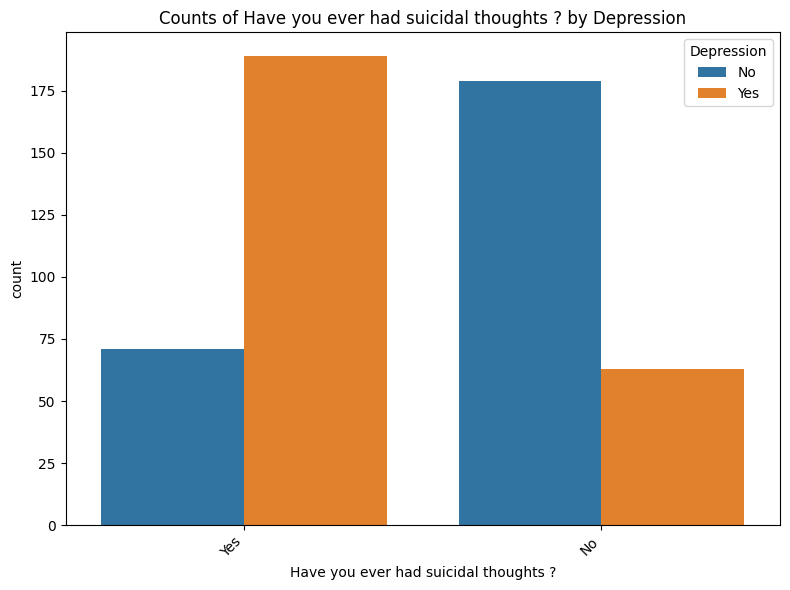

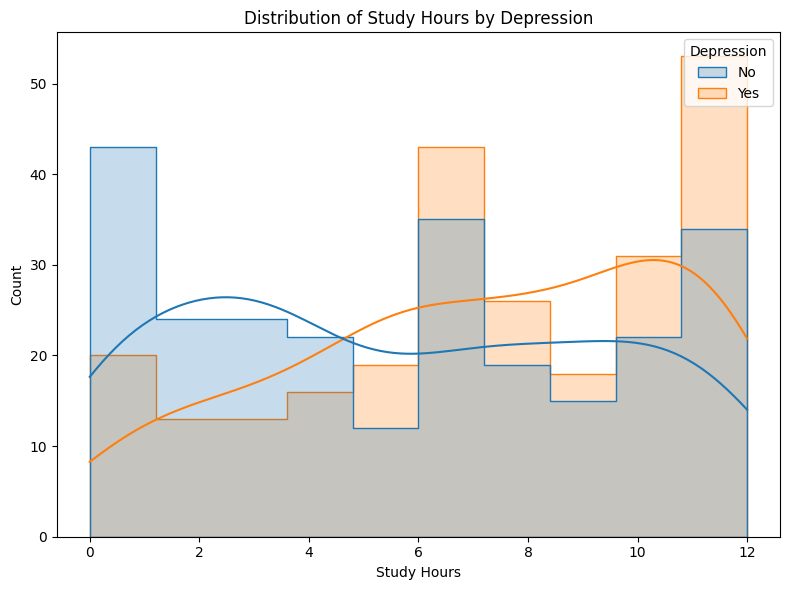

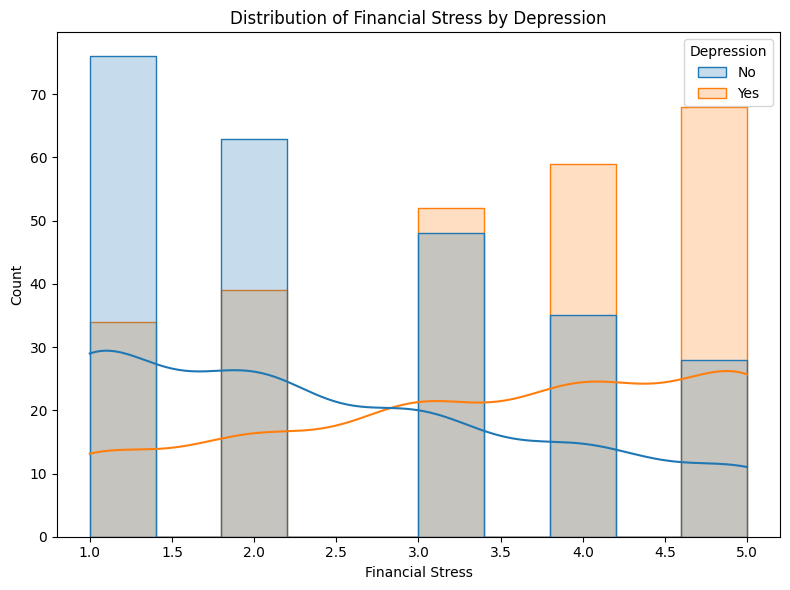

<ipython-input-35-07b96c13b2e5>:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(dataset[column]) or pd.api.types.is_object_dtype(dataset[column]):


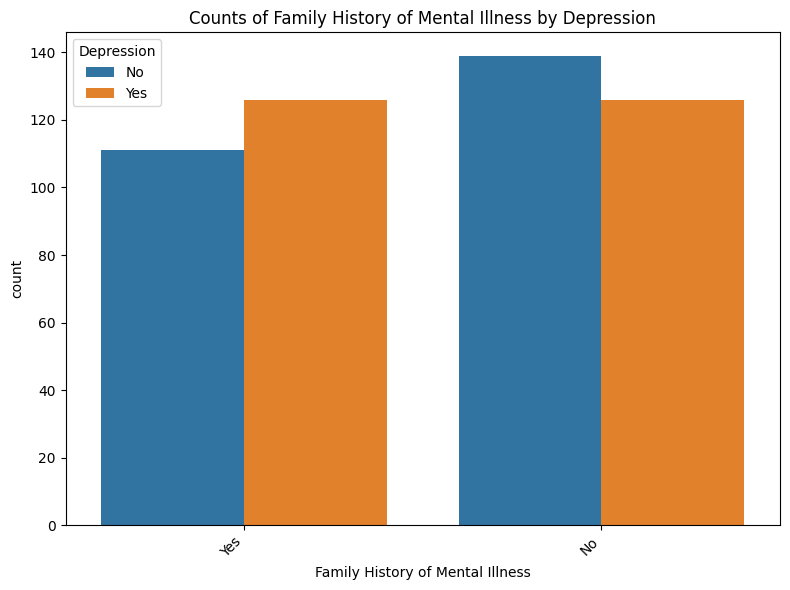

In [35]:
def visualize_histograms(dataset, target_column):
    """Visualizes histograms or bins for each feature with the target."""

    if target_column not in dataset.columns:
        print(f"Error: Target column '{target_column}' not found in the dataset.")
        return

    for column in dataset.columns:
        if column != target_column:
            plt.figure(figsize=(8, 6))  # Adjust figure size as needed

            if pd.api.types.is_numeric_dtype(dataset[column]):
                # Numerical feature: Histogram
                sns.histplot(data=dataset, x=column, hue=target_column, kde=True, element="step")  # KDE for smoother visualization
                plt.title(f"Distribution of {column} by {target_column}")

            elif pd.api.types.is_categorical_dtype(dataset[column]) or pd.api.types.is_object_dtype(dataset[column]):
                # Categorical feature: Countplot (bins)
                sns.countplot(data=dataset, x=column, hue=target_column)
                plt.title(f"Counts of {column} by {target_column}")
                plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed

            plt.tight_layout()
            plt.show()


# Example usage (assuming 'dataset' is already loaded):
target = "Depression"
visualize_histograms(dataset, target)

In [47]:
def preprocess_data(dataset, target_column):
    """Encodes categorical features and Z-scales numerical features, including the target."""

    if target_column not in dataset.columns:
        print(f"Error: Target column '{target_column}' not found in the dataset.")
        return None

    dataset_processed = dataset.copy()

    # Separate features and target
    X = dataset_processed.drop(target_column, axis=1)
    y = dataset_processed[target_column]

    # Identify numerical and categorical features
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns

    # Initialize encoders and scalers
    label_encoders = {}
    scaler = StandardScaler()
    target_encoder = None  # Initialize target encoder

    # Encode categorical features
    all_categorical_cols = list(categorical_cols)
    if pd.api.types.is_object_dtype(y):
        all_categorical_cols.append(target_column)
        target_encoder = LabelEncoder() # Create a separate encoder for the target
        y = target_encoder.fit_transform(y)


    for col in all_categorical_cols:  # Encode all categorical columns
        if col != target_column: # features
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le



    # Z-scale numerical features
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

    # Combine preprocessed features and target back into a DataFrame
    dataset_processed = pd.concat([X, pd.Series(y, name=target_column)], axis=1)

    return dataset_processed, label_encoders, scaler, target_encoder


target = "Depression"
dataset_preprocessed, feature_encoders, scaler, target_encoder = preprocess_data(dataset, target)

if dataset_preprocessed is not None:
    print(dataset_preprocessed.head())

   Gender       Age  Academic Pressure  Study Satisfaction  Sleep Duration  \
0       1  0.359587          -0.723007            0.673631               1   
1       1  0.359587           0.717269            1.402429               0   
2       1 -0.253706          -1.443146           -0.055168               0   
3       1 -0.662569          -1.443146            0.673631               3   
4       0  0.972881          -1.443146            1.402429               3   

   Dietary Habits  Have you ever had suicidal thoughts ?  Study Hours  \
0               1                                      1     0.694256   
1               0                                      1     0.159311   
2               2                                      1     0.961728   
3               2                                      1     0.159311   
4               0                                      1    -0.643106   

   Financial Stress  Family History of Mental Illness  Depression  
0         -0.652055     

In [48]:
X = dataset_preprocessed.drop('Depression', axis=1)
y = dataset_preprocessed['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [49]:
X_train.shape[0]

401

In [50]:
X_test.shape[0]

101

In [51]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """Trains and evaluates multiple categorical classification models."""

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Support Vector Machine": SVC(),
    }

    results = {}

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=1) # added zero division handling
        cm = confusion_matrix(y_test, y_pred)

        results[name] = {"accuracy": accuracy, "report": report, "confusion_matrix": cm}

        # Visualize confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

    return results


Training Logistic Regression...


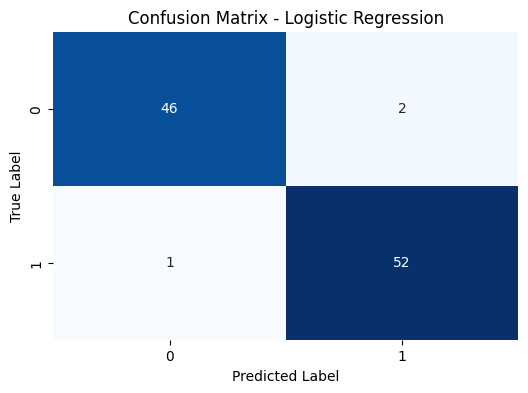

Training Naive Bayes...


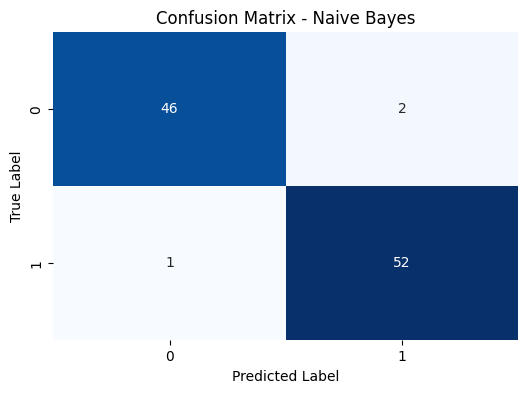

Training K-Nearest Neighbors...


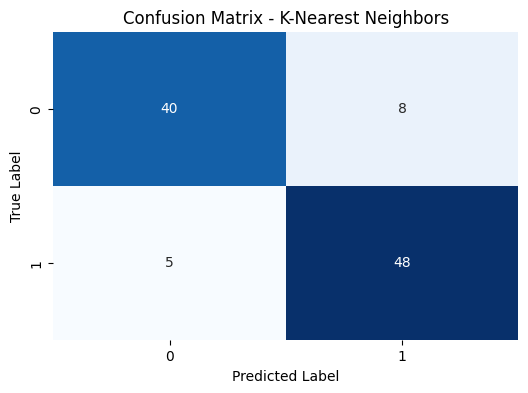

Training Decision Tree...


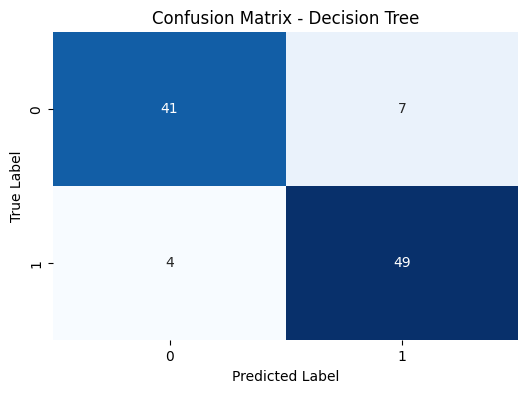

Training Random Forest...


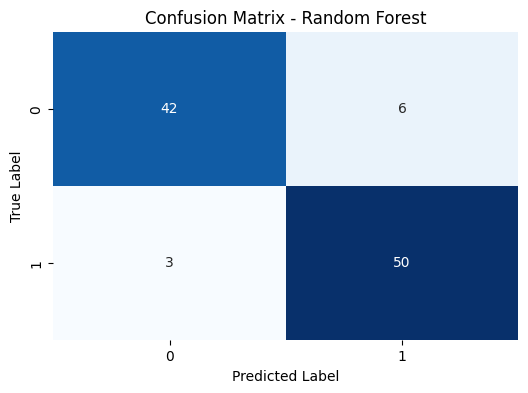

Training Gradient Boosting...


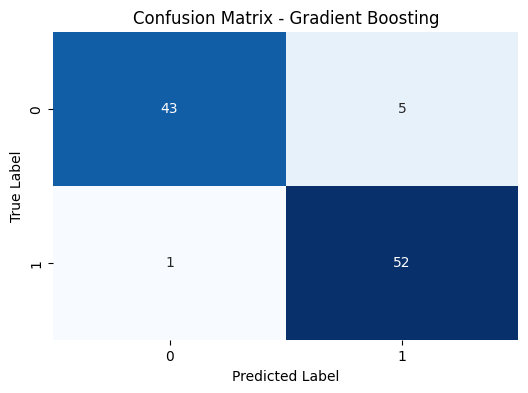

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


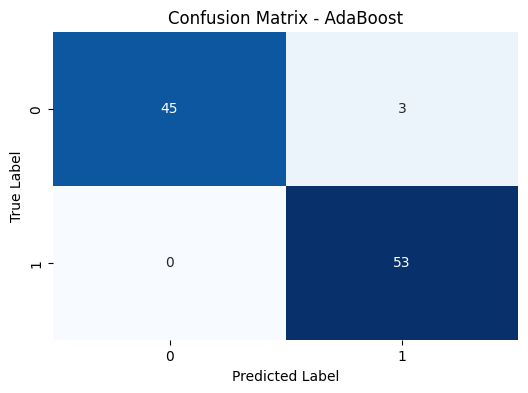

Training Support Vector Machine...


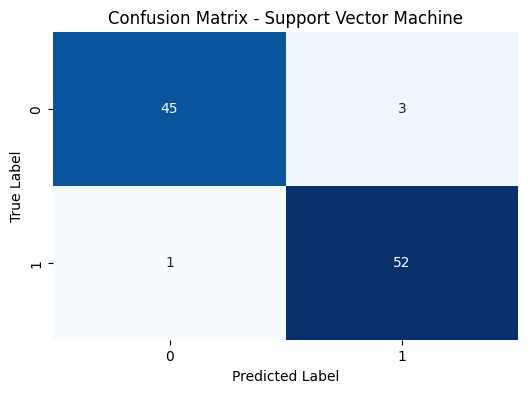


Results for Logistic Regression:
Accuracy: 0.9703
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.96      0.98      0.97        53

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101


Results for Naive Bayes:
Accuracy: 0.9703
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.96      0.98      0.97        53

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101


Results for K-Nearest Neighbors:
Accuracy: 0.8713
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        48
           1       0.86

In [52]:
if X_train is not None:  # Check if splitting was successful
    results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    for name, metrics in results.items():
        print(f"\nResults for {name}:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Classification Report:\n{metrics['report']}")

In [92]:
def train_and_evaluate_models_with_params_search(X_train, X_test, y_train, y_test, search_method="random", random_state=42):
    """Trains and evaluates models with hyperparameter tuning."""

    models = {
        "Logistic Regression": {
            "model": LogisticRegression(max_iter=1000),
            "params": {"C": [0.1, 1, 10], "penalty": ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
        },
        "Naive Bayes": {
            "model": GaussianNB(),
            "params": {}
        },
        "K-Nearest Neighbors": {
            "model": KNeighborsClassifier(),
            "params": {"n_neighbors": [3, 5, 7, 9], "weights": ['uniform', 'distance']}
        },
        "Decision Tree": {
            "model": DecisionTreeClassifier(),
            "params": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]}
        },
        "Random Forest": {
            "model": RandomForestClassifier(),
            "params": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
        },
        "Gradient Boosting": {
            "model": GradientBoostingClassifier(),
            "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.03, 0.1, 1.0]}
        },
        "AdaBoost": {
            "model": AdaBoostClassifier(),
            "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.03, 0.1, 1.0]}
        },
        "Support Vector Machine": {
            "model": SVC(),
            "params": {"C": [0.1, 1, 10], "kernel": ['linear', 'rbf']}
        },
    }

    results = {}

    for name, model_data in models.items():
        print(f"Training {name}...")
        model = model_data["model"]
        params = model_data["params"]

        if search_method == "grid":
            search = GridSearchCV(model, params, cv=5, scoring='accuracy')
        elif search_method == "random":
            search = RandomizedSearchCV(model, params, cv=5, scoring='accuracy', n_iter=10, random_state=random_state)
        else:
            raise ValueError("Invalid search_method. Use 'grid' or 'random'.")

        if hasattr(model, 'random_state'):
            model.random_state = random_state

        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=1)
        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[name] = {
            "accuracy": accuracy,
            "report": report,
            "confusion_matrix": cm,
            "best_params": search.best_params_,
            "best_score": search.best_score_,
            "best_estimator": search.best_estimator_,
            "f1_score": f1
        }

         # Visualize confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()


    return results

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

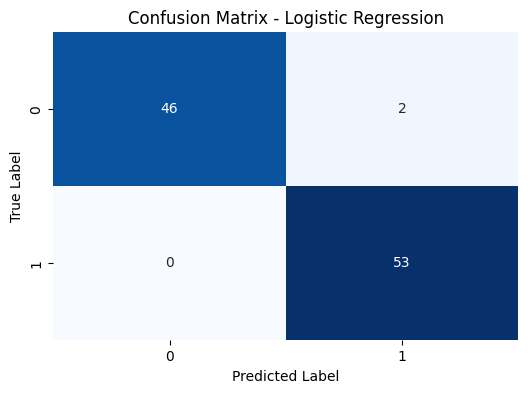

Training Naive Bayes...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colu

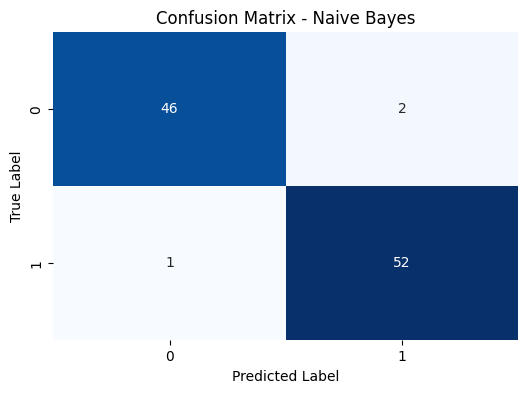

Training K-Nearest Neighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ret

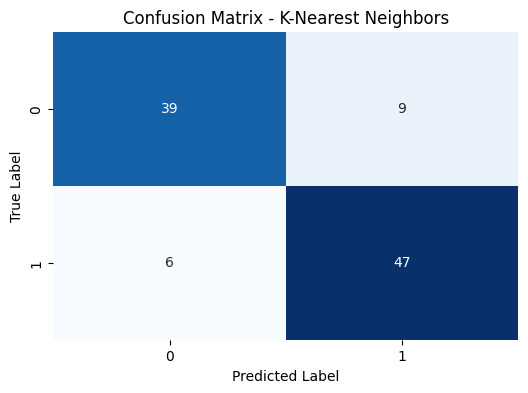

Training Decision Tree...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


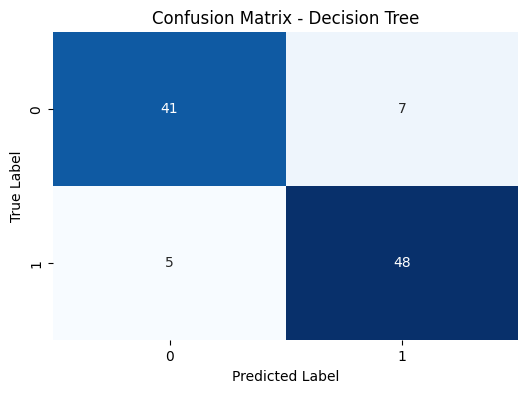

Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method

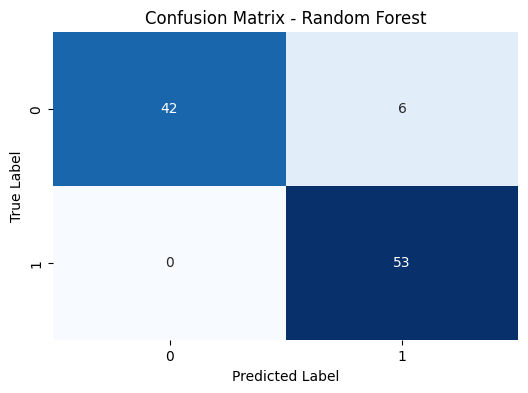

Training Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

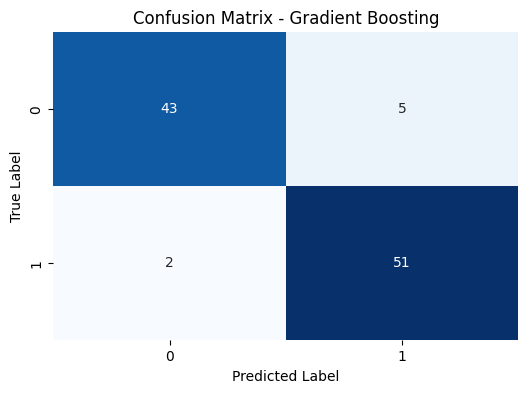

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  w

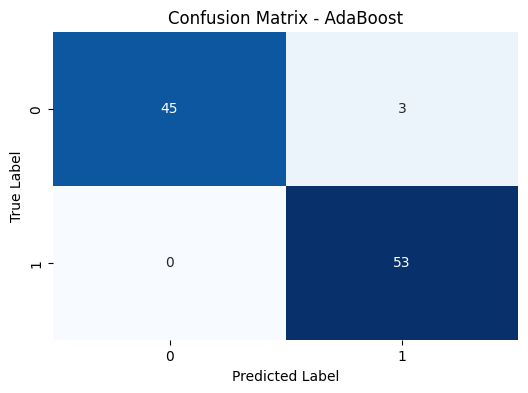

Training Support Vector Machine...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colu

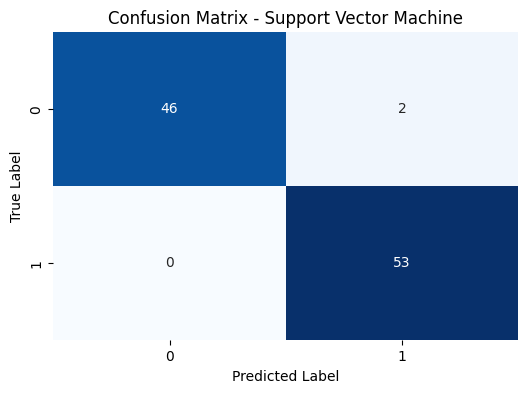


Results for Logistic Regression:
Accuracy: 0.9802
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        53

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}
Best CV Score: 0.9626

Results for Naive Bayes:
Accuracy: 0.9703
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.96      0.98      0.97        53

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101

Best Parameters: {}
Best CV Score: 0.9276

Results for K-Nearest Neighbors:
Accuracy: 0.8515
Classification Report:
  

In [93]:
if X_train is not None:
    results = train_and_evaluate_models_with_params_search(X_train, X_test, y_train, y_test, search_method="random")

    for name, metrics in results.items():
        print(f"\nResults for {name}:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Classification Report:\n{metrics['report']}")
        print(f"Best Parameters: {metrics['best_params']}")
        print(f"Best CV Score: {metrics['best_score']:.4f}")

In [94]:
best_model_name = None
best_model = None
best_f1 = -1  # Initialize best_f1

for name, metrics in results.items():
    if metrics['f1_score'] > best_f1:  # Compare based on F1-score
        best_f1 = metrics['f1_score']
        best_model_name = name
        best_model = metrics["best_estimator"]

if best_model is not None:
    print(f"\nThe best model is {best_model_name} with an F1-score of {best_f1:.4f}")


The best model is Logistic Regression with an F1-score of 0.9802


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5058 - loss: 6.6718 - val_accuracy: 0.6436 - val_loss: 6.0010
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5251 - loss: 5.8942 - val_accuracy: 0.7624 - val_loss: 5.3378
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6715 - loss: 5.1707 - val_accuracy: 0.7822 - val_loss: 4.7269
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7222 - loss: 4.6257 - val_accuracy: 0.8317 - val_loss: 4.1719
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6807 - loss: 4.1120 - val_accuracy: 0.8713 - val_loss: 3.6876
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7495 - loss: 3.6489 - val_accuracy: 0.9307 - val_loss: 3.2494
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8038 - loss: 3.2330 - val_accuracy: 0.9010 - val_loss: 2.8579
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8469 - loss: 2.8394 - val_accuracy: 0.9307 - 

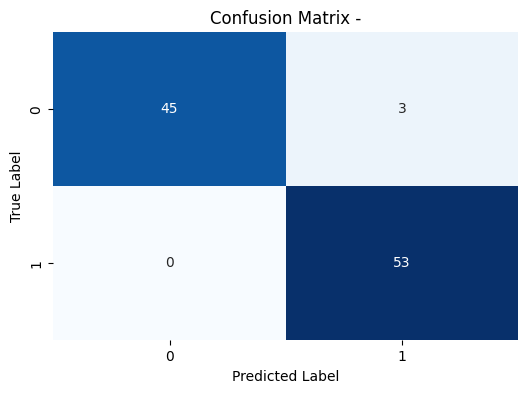

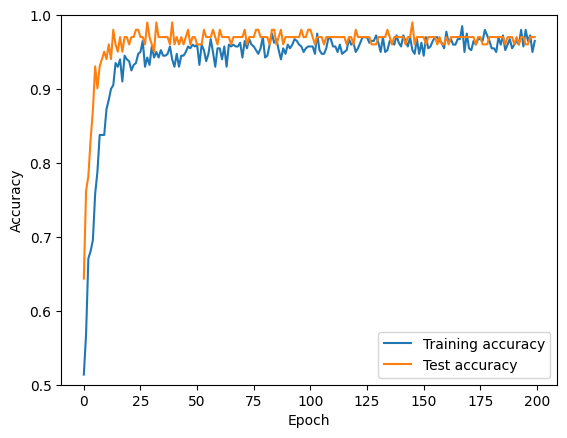

In [111]:
def create_and_train_neural_network(X_train, X_test, y_train, y_test, input_shape, num_classes, epochs=200): # Added input_shape and num_classes
    """Creates and trains a neural network."""

    tf.random.set_seed(42)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.02)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.02)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='linear', kernel_regularizer=l1_l2(l1=0.001, l2=0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes units and softmax
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy if y is not one-hot encoded
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

    # Evaluate the model and calculate F1-score
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred_prob = model.predict(X_test)  # Get predicted probabilities
    y_pred = np.argmax(y_pred_prob, axis=-1)  # Convert to class labels
    f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate weighted F1-score

    return model, history, f1, accuracy


if X_train is not None:

    input_shape = (X_train.shape[1],)  # Input shape for the neural network
    num_classes = len(np.unique(y_train))  # Number of unique classes in the target


    model, history, f1, accuracy = create_and_train_neural_network(X_train, X_test, y_train, y_test, input_shape, num_classes)


    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Neural Network Test Accuracy: {accuracy:.4f}")
    print(f"Neural Network Test F1-score: {f1:.4f}")

    y_pred = np.argmax(model.predict(X_test), axis=-1) # Convert predictions to class labels
    print(classification_report(y_test, y_pred, zero_division=1))
    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix -")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


    # Plot training history
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Test accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()